## Sentiment Analysis - Final project
## ML model building of Twitter Sentiment140 dataset
---

This notebook analyzes the sentiment of the tweets provided from the Sentiment140 dataset by developing a machine learning pipeline involving the use of the following classifiers:

(1) Logistic Regression

(2) Bernoulli Naive Bayes

(3) Support Vector Machine

(4) XGBoost

along with using Term *Frequency- Inverse Document Frequency (TF-IDF)*.

The performance of these classifiers is then evaluated using accuracy and F1 Scores.

The end result is to use the ML model to determine the polarity - positive or negative - of each tweet coming from a real-time Twitter API (bigger project).

---
**Reference resources:**

https://www.analyticsvidhya.com/blog/2021/06/twitter-sentiment-analysis-a-nlp-use-case-for-beginners/

https://github.com/redouane-dev/twitter-sentiment-analysis

Dataset is downloaded from http://help.sentiment140.com/for-students

---

### Problem Statement

In this project, we try to implement a Twitter sentiment analysis model that helps to overcome the challenges of identifying the sentiments of the tweets. The necessary details regarding the dataset are:

The dataset provided is the Sentiment140 Dataset which consists of 1,600,000 tweets that have been extracted using the Twitter API. The various columns present in the dataset are:

target: the polarity of the tweet (positive or negative)

ids: Unique id of the tweet

date: the date of the tweet

flag: It refers to the query. If no such query exists then it is NO QUERY.

user: It refers to the name of the user that tweeted

text: It refers to the text of the tweet

---


### Project Pipeline

The various steps involved in the Machine Learning Pipeline are :

1. Import Necessary Dependencies

2. Read and Load the Dataset

3. Exploratory Data Analysis

4. Data Visualization of Target Variables

5. Data Preprocessing

6. Splitting our data into Train and Test Subset

7. Transforming Dataset using TF-IDF Vectorizer

8. Function for Model Evaluation

9. Model Building

10. Conclusion

11. Logistic Regression model on a single tweet
---

### 1. Import the libraries

In [1]:
# utilities
import re
import numpy as np
import pandas as pd
# plotting
import seaborn as sns
from wordcloud import WordCloud
import matplotlib.pyplot as plt
# nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
# sklearn
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report

---

### 2. Read and load the dataset

In [2]:
# Importing the dataset
DATASET_COLUMNS=['target','ids','date','flag','user','text']
DATASET_ENCODING = "ISO-8859-1"
df = pd.read_csv('training.csv', encoding=DATASET_ENCODING, names=DATASET_COLUMNS)
df.sample(5)

,target,ids,date,flag,user,text
228172,0,1978208205,Sat May 30 22:43:02 PDT 2009,NO_QUERY,qtjene,@_veritas I want to get drunk too
1497595,4,2070406945,Sun Jun 07 17:38:21 PDT 2009,NO_QUERY,whittydittie,Is on the way to dave and busters to see the m...
1526576,4,2177051200,Mon Jun 15 05:20:43 PDT 2009,NO_QUERY,vaagen,@momof3boys3702 Thank you for your TOS Planner...
638728,0,2234537409,Thu Jun 18 23:14:42 PDT 2009,NO_QUERY,tiffunnyxD,stuck in the airport cuz of a missed flight
1081135,4,1968415645,Fri May 29 21:23:28 PDT 2009,NO_QUERY,m3liiii,sooo nice and quiet!! lol (just kiddin)


---

### 3. Exploratory data analysis

In [3]:
df.head() #first five records of data

,target,ids,date,flag,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [4]:
df.columns #for columns

Index(['target', 'ids', 'date', 'flag', 'user', 'text'], dtype='object')

In [5]:
print('Length of the data set is: ',len(df)) # length of data

Length of the data set is:  1600000


In [6]:
df.shape # shape of the data

(1600000, 6)

In [7]:
df.info() # info of data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600000 entries, 0 to 1599999
Data columns (total 6 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   target  1600000 non-null  int64 
 1   ids     1600000 non-null  int64 
 2   date    1600000 non-null  object
 3   flag    1600000 non-null  object
 4   user    1600000 non-null  object
 5   text    1600000 non-null  object
dtypes: int64(2), object(4)
memory usage: 73.2+ MB


In [8]:
df.dtypes # datatypes of all columns

target     int64
ids        int64
date      object
flag      object
user      object
text      object
dtype: object

In [9]:
np.sum(df.isnull().any(axis=1)) # checking for null values

0

In [10]:
print('Count of columns in the data is: ', len(df.columns))
print('Count of rows in the data is: ', len(df))

Count of columns in the data is:  6
Count of rows in the data is:  1600000


In [11]:
df['target'].unique()

array([0, 4])

In [12]:
df['target'].dtype

dtype('int64')

In [13]:
df['target'].nunique() # To find out the number of unique elements in the object.Excludes NA values by default.

2

In [14]:
df.flag.nunique()

1

In [15]:
df['target'].sample(5)

24290      0
852236     4
1037651    4
252588     0
460394     0
Name: target, dtype: int64

---

### 4. Data visualization of target variables

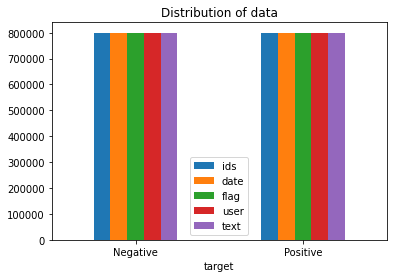

In [16]:
# plotting the distribution of dataset
ax=df.groupby('target').count().plot(kind='bar', title='Distribution of data')
ax.set_xticklabels(['Negative','Positive'],rotation=0)
# storing data in lists
text,sentiment=list(df['text']), list(df['target'])

<AxesSubplot:xlabel='target', ylabel='count'>

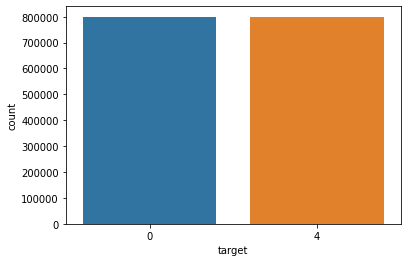

In [17]:
import seaborn as sns
sns.countplot(x='target', data=df)

---

### 5. Data preprocessing for better results

5.1 Convert into lower case for better generalization

5.2 Clean and remove URLs  and handles (@User) 

5.3 Remove stopwords

5.4 Clean and remove punctuations

5.5 Clean and remove numbers

5.6 Tokenization of tweet text

5.7 Perform Stemming(reducing the words to their derived stems)

5.8 Perform Normalization - Lemmatization (reducing the derived words to their root form known as lemma)

5.9 Seperate input feature and label

5.10 Plot clouds of words for postive tweets and negative tweets

5.11 Determining word density of the dataset

In [18]:
data = df.drop(['ids','date','flag','user'],axis=1) # selecting the text and target column for our further analysis

In [19]:
data['target'] = data['target'].replace(4,1) # replacing value 4 by value 1 for positive sentiment

In [20]:
data['target'].unique() #find out the unique values in target column of dataset data

array([0, 1])

In [21]:
data['target'].dtype #find out the data type of target column of dataset data

dtype('int64')

In [22]:
data.head()

,target,text
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,is upset that he can't update his Facebook by ...
2,0,@Kenichan I dived many times for the ball. Man...
3,0,my whole body feels itchy and like its on fire
4,0,"@nationwideclass no, it's not behaving at all...."


#### 5.1 convert 'text' column to lower case for better generalization

In [23]:
data['text']=data['text'].str.lower()
data['text'].tail()

1599995    just woke up. having no school is the best fee...
1599996    thewdb.com - very cool to hear old walt interv...
1599997    are you ready for your mojo makeover? ask me f...
1599998    happy 38th birthday to my boo of alll time!!! ...
1599999    happy #charitytuesday @thenspcc @sparkscharity...
Name: text, dtype: object

In [24]:
data['text'].head

<bound method NDFrame.head of 0          @switchfoot http://twitpic.com/2y1zl - awww, t...
1          is upset that he can't update his facebook by ...
2          @kenichan i dived many times for the ball. man...
3            my whole body feels itchy and like its on fire 
4          @nationwideclass no, it's not behaving at all....
                                 ...                        
1599995    just woke up. having no school is the best fee...
1599996    thewdb.com - very cool to hear old walt interv...
1599997    are you ready for your mojo makeover? ask me f...
1599998    happy 38th birthday to my boo of alll time!!! ...
1599999    happy #charitytuesday @thenspcc @sparkscharity...
Name: text, Length: 1600000, dtype: object>

#### 5.2 Clean and remove URLs and handles (@User)

In [25]:
def cleaning_URLs(data):
    return re.sub('((www.[^s]+)|(http?://[^s]+)|(https?://[^s]+))','',data)
data['text']=data['text'].apply(lambda x: cleaning_URLs(x))
data['text'].head()

0    @switchfoot s a bummer.  you shoulda got david...
1    is upset that he can't update his facebook by ...
2    @kenichan i dived many times for the ball. man...
3      my whole body feels itchy and like its on fire 
4    @nationwideclass no, it's not behaving at all....
Name: text, dtype: object

In [26]:
def remove_pattern(input_txt, pattern):
    r=re.findall(pattern,input_txt)
    for i in r:
        input_txt = re.sub(i,'',input_txt)
    return input_txt
# remove twitter handles (@user)
data['text']=np.vectorize(remove_pattern)(data['text'],"@[\w]*")

In [27]:
data['text'].head()

0     s a bummer.  you shoulda got david carr of th...
1    is upset that he can't update his facebook by ...
2     i dived many times for the ball. managed to s...
3      my whole body feels itchy and like its on fire 
4     no, it's not behaving at all. i'm mad. why am...
Name: text, dtype: object

#### 5.3 remove stopwords

In [28]:
stopwords1=stopwords.words('english')
stopwords1[:3]

['i', 'me', 'my']

In [29]:
def cleaning_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in stopwords1])
data['text'] = data['text'].apply(lambda text: cleaning_stopwords(text))
data['text'].head()

0      bummer. shoulda got david carr third day it. ;d
1    upset can't update facebook texting it... migh...
2    dived many times ball. managed save 50% rest g...
3                     whole body feels itchy like fire
4    no, behaving all. i'm mad. here? can't see there.
Name: text, dtype: object

#### 5.4 clean and remove punctuations


In [30]:
from string import punctuation

punctuations_list = punctuation
def cleaning_punctuations(text):
    translator = str.maketrans('', '', punctuations_list)
    return text.translate(translator)
data['text']= data['text'].apply(lambda x: cleaning_punctuations(x))

data['text'].head()

0         bummer shoulda got david carr third day it d
1    upset cant update facebook texting it might cr...
2    dived many times ball managed save 50 rest go ...
3                     whole body feels itchy like fire
4           no behaving all im mad here cant see there
Name: text, dtype: object

In [31]:
data['text'].tail()

1599995                     woke up school best feeling ever
1599996         thewdbcom  cool hear old walt interviews â«
1599997                      ready mojo makeover ask details
1599998    happy 38th birthday boo alll time tupac amaru ...
1599999                                 happy charitytuesday
Name: text, dtype: object

#### 5.5 Clean and remove numbers

In [32]:
def cleaning_numbers(data):
    return re.sub('[0-9]+','',data)
data['text']=data['text'].apply(lambda x: cleaning_numbers(x))
data['text'].head()

0         bummer shoulda got david carr third day it d
1    upset cant update facebook texting it might cr...
2    dived many times ball managed save  rest go bo...
3                     whole body feels itchy like fire
4           no behaving all im mad here cant see there
Name: text, dtype: object

In [33]:
data['text'].tail()

1599995                     woke up school best feeling ever
1599996         thewdbcom  cool hear old walt interviews â«
1599997                      ready mojo makeover ask details
1599998    happy th birthday boo alll time tupac amaru sh...
1599999                                 happy charitytuesday
Name: text, dtype: object

### 5.6 Tokenization of tweet text

In [34]:
from nltk.tokenize import TweetTokenizer

# Instantiate a tweet tokenizer that will preserve each word (or token) as it is
tweet_tokenizer = TweetTokenizer(
    preserve_case = True,
    reduce_len    = False,
    strip_handles = False)

tweets=data['text']

tokens = [tweet_tokenizer.tokenize(t) for t in tweets]

print("Example of a tweet:\n{}\n".format(tweets[0]))
print("Tokens:\n{}".format(tokens[0]))

Example of a tweet:
bummer shoulda got david carr third day it d

Tokens:
['bummer', 'shoulda', 'got', 'david', 'carr', 'third', 'day', 'it', 'd']


In [35]:
data['text'] = tokens

In [36]:
data['text'].head()

0    [bummer, shoulda, got, david, carr, third, day...
1    [upset, cant, update, facebook, texting, it, m...
2    [dived, many, times, ball, managed, save, rest...
3              [whole, body, feels, itchy, like, fire]
4    [no, behaving, all, im, mad, here, cant, see, ...
Name: text, dtype: object

#### 5.7 Apply Stemming

In [37]:
from nltk.stem import SnowballStemmer
import nltk
st = nltk.SnowballStemmer('english')
def stemming_on_text(data):
    text = [st.stem(word) for word in data]
    return text
data['text']= data['text'].apply(lambda x: stemming_on_text(x))
data['text'].head()

0    [bummer, shoulda, got, david, carr, third, day...
1    [upset, cant, updat, facebook, text, it, might...
2    [dive, mani, time, ball, manag, save, rest, go...
3               [whole, bodi, feel, itchi, like, fire]
4    [no, behav, all, im, mad, here, cant, see, there]
Name: text, dtype: object

#### 5.8 Apply Lemmatizer

In [38]:
from nltk.tag import pos_tag    # Part-of-speech tagger

tags = [pos_tag(t) for t in data['text']]

In [39]:
from nltk.stem.wordnet import WordNetLemmatizer

# All we need is to know the type (Noun, Verb, or others) of each word
def _tag2type(tag):
    '''
    Take a tag and return a type.
    return 'n' for noun, 'v' for verb, and 'a' for any
    '''
    if tag.startswith('NN'):
        return 'n'
    elif tag.startswith('VB'):
        return 'v'
    else:
        return 'a'

lemmatizer = WordNetLemmatizer()
data['text']= [[lemmatizer.lemmatize(word, _tag2type(tag)) for (word, tag) in t] for t in tags]
data['text'].head()

0    [bummer, shoulda, get, david, carr, third, day...
1    [upset, cant, updat, facebook, text, it, might...
2    [dive, mani, time, ball, manag, save, rest, go...
3               [whole, bodi, feel, itchi, like, fire]
4    [no, behav, all, im, mad, here, cant, see, there]
Name: text, dtype: object

In [40]:
data['text'].tail()

1599995                 [wake, up, school, best, feel, ever]
1599996    [thewdbcom, cool, hear, old, walt, interview, ...
1599997                   [readi, mojo, makeov, ask, detail]
1599998    [happi, th, birthday, boo, alll, time, tupac, ...
1599999                              [happi, charitytuesday]
Name: text, dtype: object

#### 5.9 Seperate input feature and label

In [41]:
X=data.text
y=data.target

In [42]:
type(X)

pandas.core.series.Series

In [43]:
type(y)

pandas.core.series.Series

In [44]:
# seperating data dataset into positive and negative dataframes

data_pos=data[data['target']==1]
data_neg=data[data['target']==0]

In [45]:
data_neg

,target,text
0,0,"[bummer, shoulda, get, david, carr, third, day..."
1,0,"[upset, cant, updat, facebook, text, it, might..."
2,0,"[dive, mani, time, ball, manag, save, rest, go..."
3,0,"[whole, bodi, feel, itchi, like, fire]"
4,0,"[no, behav, all, im, mad, here, cant, see, there]"
...,...,...
799995,0,"[sick, spend, day, lay, bed, listen]"
799996,0,"[gmail, down]"
799997,0,"[rest, peac, farrah, sad]"
799998,0,"[sound, like, rival, flag, ad, much, though]"


In [46]:
pos_tweets=data_pos['text'].values

In [47]:
neg_tweets=data_neg['text'].values

#### 5.10 Plot clouds of words for postive tweets and negative tweets

Text(0.5, 1.0, 'Word Cloud for Negative tweets')

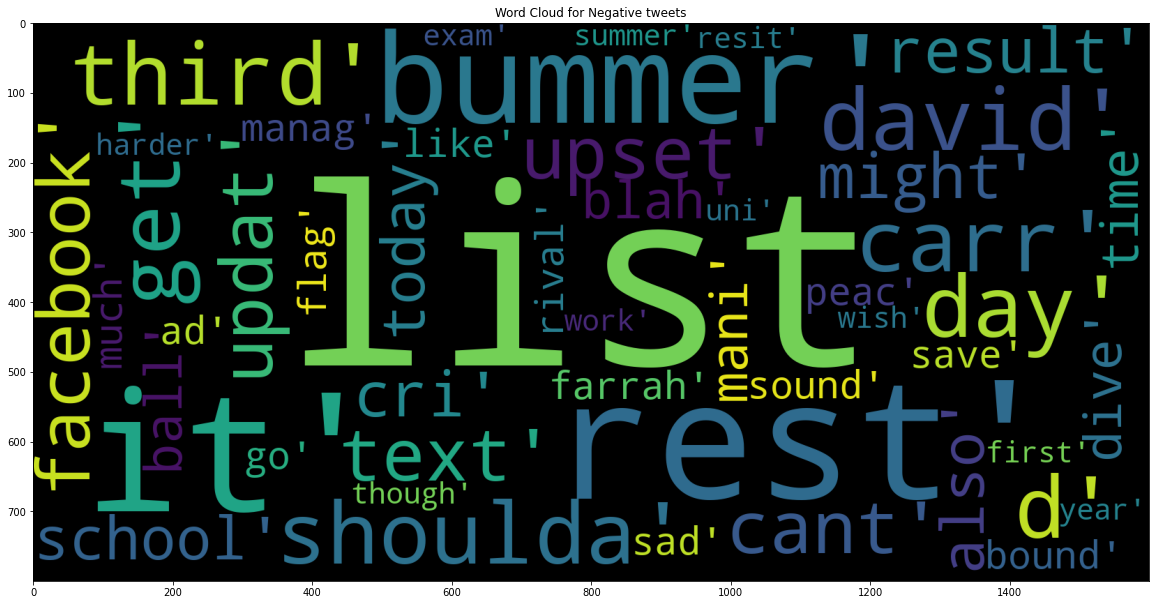

In [48]:
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800,
               collocations=False).generate(str(neg_tweets))
plt.imshow(wc)
plt.title('Word Cloud for Negative tweets')


Text(0.5, 1.0, 'Word Cloud for Positive tweets')

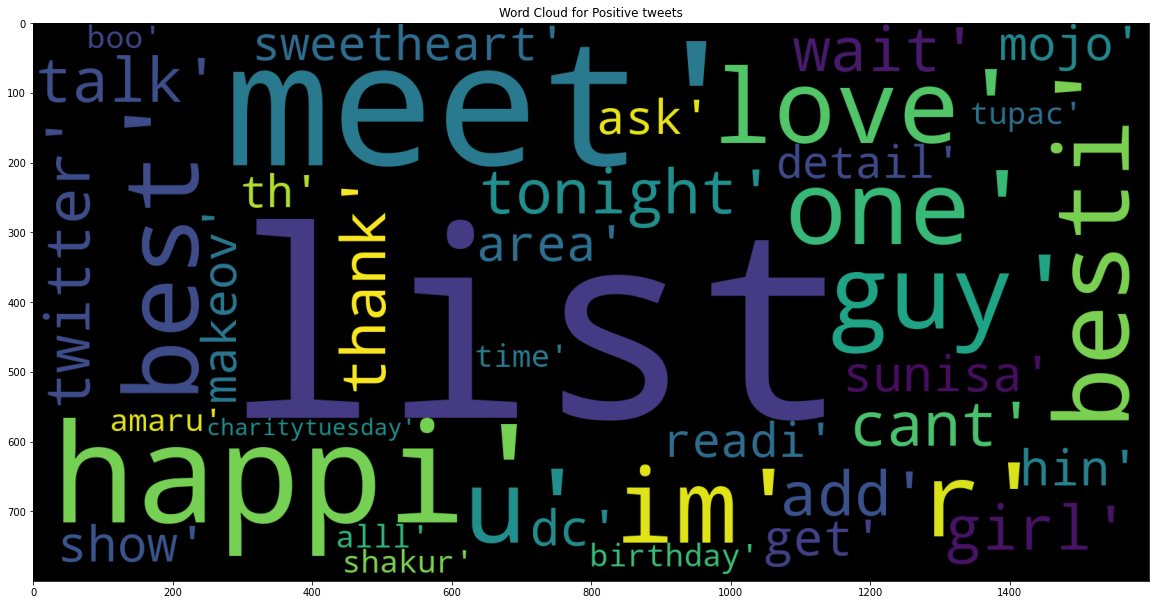

In [49]:
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800,
               collocations=False).generate(str(pos_tweets))
plt.imshow(wc)
plt.title('Word Cloud for Positive tweets')

#### 5.11 Determining word density of the dataset

In [50]:
from nltk import FreqDist

def get_all_words(tokens_list):
    '''
    Generator function to get a flat mapping of all words in the dataset.
    
    @arg tokens_list: A 2-D list of (preferably cleaned) tokens
    @return A list of all words
    '''
    for tokens in tokens_list:
        for token in tokens:
            yield token

all_pos_words = get_all_words(pos_tweets)
all_neg_words = get_all_words(neg_tweets)

freq_dist_pos = FreqDist(all_pos_words)
freq_dist_neg = FreqDist(all_neg_words)

print("The 10 most common words in a set of positive tweets:\n{}\n".format(freq_dist_pos.most_common(10)))
print("The 10 most common words in a set of negative tweets:\n{}".format(freq_dist_neg.most_common(10)))

The 10 most common words in a set of positive tweets:
[('get', 76108), ('im', 74436), ('good', 73204), ('go', 65369), ('love', 58765), ('day', 53793), ('thank', 49147), ('like', 39783), ('lol', 33400), ('time', 33299)]

The 10 most common words in a set of negative tweets:
[('im', 101991), ('get', 94068), ('go', 92598), ('work', 57252), ('day', 49959), ('miss', 46693), ('cant', 43364), ('like', 42726), ('want', 39850), ('good', 39208)]


---

### 6. Splitting the data into train and test subsets

In [51]:
# Separating the 90% data for training data and 10% for testing data
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.1, random_state =50)

---

### 7.  Transforming Dataset using TF-IDF Vectorizer
#### 7.1: Fit the TF-IDF Vectorizer

In [52]:
vectoriser = TfidfVectorizer(ngram_range=(1,2), max_features=500000)
vectoriser.fit(X_train.apply(lambda x: ' '.join(x)))
print('No. of feature_words: ', len(vectoriser.get_feature_names()))

/Users/ballakeerthi/dev/Final_Project_KCD/finalprojvenv/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


No. of feature_words:  500000


#### 7.2 Transform the data using TF-IDF Vectorizer

In [53]:
X_train = vectoriser.transform(X_train.apply(lambda x: ' '.join(x)))
X_test  = vectoriser.transform(X_test.apply(lambda x: ' '.join(x)))

---

### 8. Model Evaluation

After training the model we then apply the evaluation measures to check how the model is performing. Accordingly, we use the following evaluation parameters to check the performance of the models respectively :

- Accuracy Score
- Confusion Matrix with Plot
- ROC-AUC Curve

In [54]:
def model_Evaluate(model):
    # Predict values for Test dataset
    y_pred = model.predict(X_test)
    # Print the evaluation metrics for the dataset.
    print(classification_report(y_test, y_pred))
    # Compute and plot the Confusion matrix
    cf_matrix = confusion_matrix(y_test, y_pred)
    categories = ['Negative','Positive']
    group_names = ['True Neg','False Pos', 'False Neg','True Pos']
    group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten() / np.sum(cf_matrix)]
    labels = [f'{v1}n{v2}' for v1, v2 in zip(group_names,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sns.heatmap(cf_matrix, annot = labels, cmap = 'Blues',fmt = '',
    xticklabels = categories, yticklabels = categories)
    plt.xlabel("Predicted values", fontdict = {'size':14}, labelpad = 10)
    plt.ylabel("Actual values" , fontdict = {'size':14}, labelpad = 10)
    plt.title ("Confusion Matrix", fontdict = {'size':18}, pad = 20)

---

### 9 Model Building

Following classifiers are evaluated to see which one gives the best performance:

9.1 Bernoulli Naive Bayes

9.2 SVM (Support Vector Machine)

9.3 Logistic Regression

9.4 XGBoost


#### 9.1: Model-1 Bernoulli Naive Bayes

              precision    recall  f1-score   support

           0       0.79      0.74      0.77     80139
           1       0.76      0.80      0.78     79861

    accuracy                           0.77    160000
   macro avg       0.78      0.77      0.77    160000
weighted avg       0.78      0.77      0.77    160000



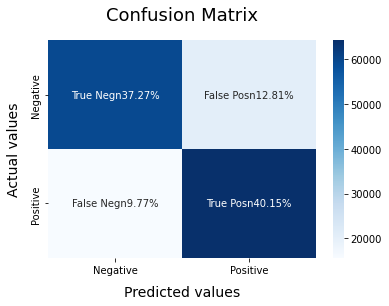

In [55]:
BNBmodel = BernoulliNB()
BNBmodel.fit(X_train, y_train)
model_Evaluate(BNBmodel)
y_pred1 = BNBmodel.predict(X_test)

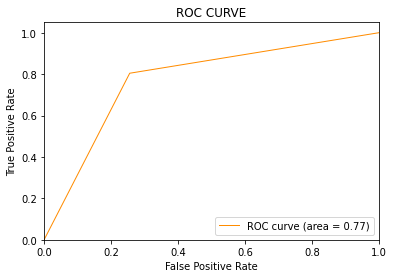

In [56]:
# Plot the ROC-AUC Curve for model-1
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, y_pred1)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC CURVE')
plt.legend(loc="lower right")
plt.show()

#### 9.2 Model-2 SVM (Support Vector Machine)

              precision    recall  f1-score   support

           0       0.78      0.76      0.77     80139
           1       0.77      0.79      0.78     79861

    accuracy                           0.78    160000
   macro avg       0.78      0.78      0.78    160000
weighted avg       0.78      0.78      0.78    160000



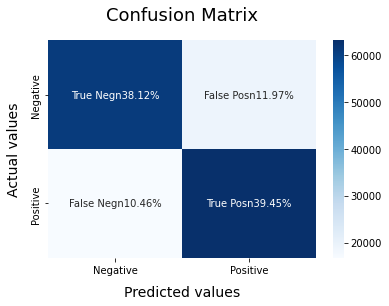

In [57]:
SVCmodel = LinearSVC()
SVCmodel.fit(X_train, y_train)
model_Evaluate(SVCmodel)
y_pred2 = SVCmodel.predict(X_test)

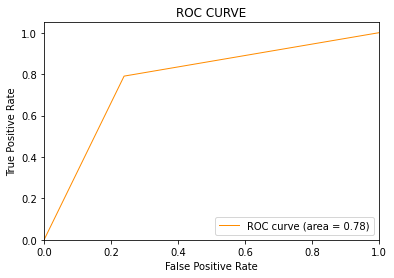

In [58]:
# Plot the ROC-AUC curve for model-2
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, y_pred2)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC CURVE')
plt.legend(loc="lower right")
plt.show()

#### 9.3 Model-3 Logistic Regression

              precision    recall  f1-score   support

           0       0.80      0.77      0.79     80139
           1       0.78      0.81      0.79     79861

    accuracy                           0.79    160000
   macro avg       0.79      0.79      0.79    160000
weighted avg       0.79      0.79      0.79    160000



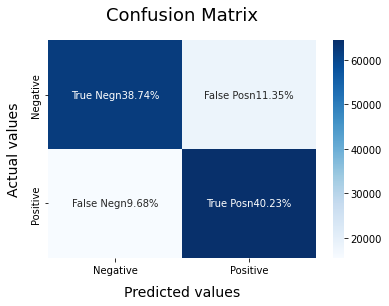

In [59]:
LRmodel = LogisticRegression(C = 2, max_iter = 1000, n_jobs=-1)
LRmodel.fit(X_train, y_train)
model_Evaluate(LRmodel)
y_pred3 = LRmodel.predict(X_test)

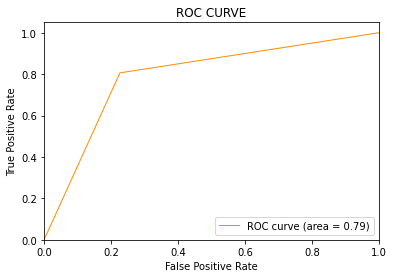

In [60]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, y_pred3)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC CURVE')
plt.legend(loc="lower right")
plt.show()

#### 9.4 Model-4 XGBoost

/Users/ballakeerthi/dev/Final_Project_KCD/finalprojvenv/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:44:36] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
              precision    recall  f1-score   support

           0       0.79      0.65      0.71     80139
           1       0.70      0.83      0.76     79861

    accuracy                           0.74    160000
   macro avg       0.75      0.74      0.74    160000
weighted avg       0.75      0.74      0.74    160000



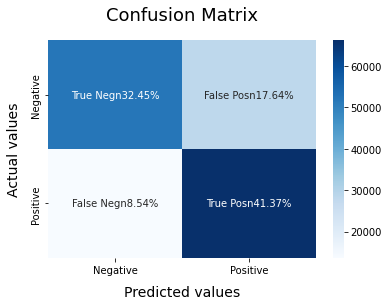

In [61]:
from xgboost import XGBClassifier
XGBmodel = XGBClassifier()
XGBmodel.fit(X_train, y_train)
model_Evaluate(XGBmodel)
y_pred4 = XGBmodel.predict(X_test)

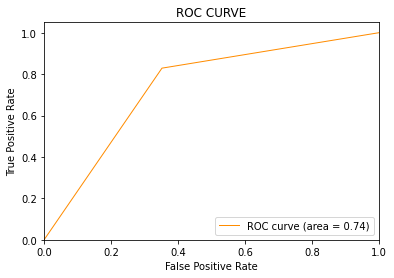

In [62]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, y_pred4)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC CURVE')
plt.legend(loc="lower right")
plt.show()

---
### 10. Conclusion

As per above section 9 evaluations, we can conclude the following:

**Accuracy:** In accuracy, Logistic Regression (Model-3: 0.79) performs better than Support Vector Machine (Model-2: 0.78), Bernoulli Naive Bayes (Model-1: 0.77) and XG Boost (Model-4: 0.74).

**F1-score:** The F1 Scores for class 0 and class 1 are :
(a) For class 0: XGBoost (accuracy=0.71) < Bernoulli Naive Bayes(accuracy = 0.77) < SVM (accuracy =0.78) < Logistic Regression (accuracy = 0.79)
(b) For class 1: XGBoost (accuracy=0.76) < Bernoulli Naive Bayes (accuracy = 0.78) = SVM (accuracy = 0.78) < Logistic Regression (accuracy = 0.79)

**AUC Score:** In ROC-AUC score, Logistic Regression (Model-3: 0.79) performs better than Support Vector Machine (Model-2: 0.78), Bernoulli Naive Bayes (Model-1: 0.78) and XGBoost (Model-4: 0.74)

##### We, therefore, conclude that the **Logistic Regression** is the best model for the Sentiment140 dataset.

### 11. Logistic Regression model on a single tweet

#### 11.1 Negative tweet

In [63]:
data1=pd.DataFrame(data=["Today is a bad day"], columns=["text"])

##### Data Pre-processing

In [64]:
# convert 'text' column to lower case for better generalization
data1['text']=data1['text'].str.lower()
data1['text'].tail()

0    today is a bad day
Name: text, dtype: object

In [65]:
data1['text'].head

<bound method NDFrame.head of 0    today is a bad day
Name: text, dtype: object>

In [66]:
# Clean and remove URLs and handles (@User)
def cleaning_URLs1(data):
    return re.sub('((www.[^s]+)|(http?://[^s]+)|(https?://[^s]+))','',data)
data1['text']=data1['text'].apply(lambda x: cleaning_URLs1(x))
data1['text'].head()

0    today is a bad day
Name: text, dtype: object

In [67]:
def remove_pattern(input_txt, pattern):
    r=re.findall(pattern,input_txt)
    for i in r:
        input_txt = re.sub(i,'',input_txt)
    return input_txt
# remove twitter handles (@user)
data1['text']=np.vectorize(remove_pattern)(data1['text'],"@[\w]*")

In [68]:
data1['text'].head()

0    today is a bad day
Name: text, dtype: object

In [69]:
# remove stopwords
stopwords2=stopwords.words('english')
stopwords2[:3]

['i', 'me', 'my']

In [70]:
def cleaning_stopwords1(text):
    return " ".join([word for word in str(text).split() if word not in stopwords2])
data1['text'] = data1['text'].apply(lambda text: cleaning_stopwords1(text))
data1['text'].head()

0    today bad day
Name: text, dtype: object

In [71]:
# clean and remove punctuations
from string import punctuation

punctuations_list = punctuation
def cleaning_punctuations(text):
    translator = str.maketrans('', '', punctuations_list)
    return text.translate(translator)
data1['text']= data1['text'].apply(lambda x: cleaning_punctuations(x))

data1['text'].head()

0    today bad day
Name: text, dtype: object

In [72]:
data1['text'].tail()

0    today bad day
Name: text, dtype: object

In [73]:
# Clean and remove numbers
def cleaning_numbers(data):
    return re.sub('[0-9]+','',data)
data1['text']=data1['text'].apply(lambda x: cleaning_numbers(x))
data1['text'].head()

0    today bad day
Name: text, dtype: object

In [74]:
data1['text'].tail()

0    today bad day
Name: text, dtype: object

In [75]:
# Tokenization of tweet text
from nltk.tokenize import TweetTokenizer

# Instantiate a tweet tokenizer that will preserve each word (or token) as it is
tweet_tokenizer1 = TweetTokenizer(
    preserve_case = True,
    reduce_len    = False,
    strip_handles = False)

tweets1=data1['text']

tokens1 = [tweet_tokenizer1.tokenize(t) for t in tweets1]

print("Example of a tweet:\n{}\n".format(tweets1[0]))
print("Tokens:\n{}".format(tokens1[0]))

Example of a tweet:
today bad day

Tokens:
['today', 'bad', 'day']


In [76]:
data1['text'] = tokens1

In [77]:
data1['text'].head()

0    [today, bad, day]
Name: text, dtype: object

In [78]:
#### Apply Stemming
from nltk.stem import SnowballStemmer
import nltk
st = nltk.SnowballStemmer('english')
def stemming_on_text(data):
    text = [st.stem(word) for word in data]
    return text
data1['text']= data1['text'].apply(lambda x: stemming_on_text(x))
data1['text'].head()

0    [today, bad, day]
Name: text, dtype: object

In [79]:
#### Apply Lemmatizer
from nltk.tag import pos_tag    # Part-of-speech tagger

tags1 = [pos_tag(t) for t in data1['text']]

In [80]:
from nltk.stem.wordnet import WordNetLemmatizer

# All we need is to know the type (Noun, Verb, or others) of each word
def _tag2type(tag):
    '''
    Take a tag and return a type.
    return 'n' for noun, 'v' for verb, and 'a' for any
    '''
    if tag.startswith('NN'):
        return 'n'
    elif tag.startswith('VB'):
        return 'v'
    else:
        return 'a'

lemmatizer1 = WordNetLemmatizer()
data1['text']= [[lemmatizer1.lemmatize(word, _tag2type(tag)) for (word, tag) in t] for t in tags1]
data1['text'].head()

0    [today, bad, day]
Name: text, dtype: object

In [81]:
data1['text'].tail()

0    [today, bad, day]
Name: text, dtype: object

In [82]:
X1=data1.text

In [83]:
X1  = vectoriser.transform(X1.apply(lambda x: ' '.join(x)))

In [84]:
y_pred_LR = LRmodel.predict(X1)

In [85]:
y_pred_LR

array([0])

#### 11.2 Positive tweet

In [88]:
data1=pd.DataFrame(data=["Today is a bright and sunny day"], columns=["text"])

##### Data Pre-processing

In [89]:
# convert 'text' column to lower case for better generalization
data1['text']=data1['text'].str.lower()
data1['text'].tail()

0    today is a bright and sunny day
Name: text, dtype: object

In [90]:
data1['text'].head

<bound method NDFrame.head of 0    today is a bright and sunny day
Name: text, dtype: object>

In [91]:
# Clean and remove URLs and handles (@User)
def cleaning_URLs1(data):
    return re.sub('((www.[^s]+)|(http?://[^s]+)|(https?://[^s]+))','',data)
data1['text']=data1['text'].apply(lambda x: cleaning_URLs1(x))
data1['text'].head()

0    today is a bright and sunny day
Name: text, dtype: object

In [92]:
def remove_pattern(input_txt, pattern):
    r=re.findall(pattern,input_txt)
    for i in r:
        input_txt = re.sub(i,'',input_txt)
    return input_txt
# remove twitter handles (@user)
data1['text']=np.vectorize(remove_pattern)(data1['text'],"@[\w]*")

In [93]:
data1['text'].head()

0    today is a bright and sunny day
Name: text, dtype: object

In [94]:
# remove stopwords
stopwords2=stopwords.words('english')
stopwords2[:3]

['i', 'me', 'my']

In [95]:
def cleaning_stopwords1(text):
    return " ".join([word for word in str(text).split() if word not in stopwords2])
data1['text'] = data1['text'].apply(lambda text: cleaning_stopwords1(text))
data1['text'].head()

0    today bright sunny day
Name: text, dtype: object

In [96]:
# clean and remove punctuations
from string import punctuation

punctuations_list = punctuation
def cleaning_punctuations(text):
    translator = str.maketrans('', '', punctuations_list)
    return text.translate(translator)
data1['text']= data1['text'].apply(lambda x: cleaning_punctuations(x))

data1['text'].head()

0    today bright sunny day
Name: text, dtype: object

In [97]:
data1['text'].tail()

0    today bright sunny day
Name: text, dtype: object

In [98]:
# Clean and remove numbers
def cleaning_numbers(data):
    return re.sub('[0-9]+','',data)
data1['text']=data1['text'].apply(lambda x: cleaning_numbers(x))
data1['text'].head()

0    today bright sunny day
Name: text, dtype: object

In [99]:
data1['text'].tail()

0    today bright sunny day
Name: text, dtype: object

In [100]:
# Tokenization of tweet text
from nltk.tokenize import TweetTokenizer

# Instantiate a tweet tokenizer that will preserve each word (or token) as it is
tweet_tokenizer1 = TweetTokenizer(
    preserve_case = True,
    reduce_len    = False,
    strip_handles = False)

tweets1=data1['text']

tokens1 = [tweet_tokenizer1.tokenize(t) for t in tweets1]

print("Example of a tweet:\n{}\n".format(tweets1[0]))
print("Tokens:\n{}".format(tokens1[0]))

Example of a tweet:
today bright sunny day

Tokens:
['today', 'bright', 'sunny', 'day']


In [101]:
data1['text'] = tokens1

In [102]:
data1['text'].head()

0    [today, bright, sunny, day]
Name: text, dtype: object

In [103]:
#### Apply Stemming
from nltk.stem import SnowballStemmer
import nltk
st = nltk.SnowballStemmer('english')
def stemming_on_text(data):
    text = [st.stem(word) for word in data]
    return text
data1['text']= data1['text'].apply(lambda x: stemming_on_text(x))
data1['text'].head()

0    [today, bright, sunni, day]
Name: text, dtype: object

In [104]:
#### Apply Lemmatizer
from nltk.tag import pos_tag    # Part-of-speech tagger

tags1 = [pos_tag(t) for t in data1['text']]

In [105]:
from nltk.stem.wordnet import WordNetLemmatizer

# All we need is to know the type (Noun, Verb, or others) of each word
def _tag2type(tag):
    '''
    Take a tag and return a type.
    return 'n' for noun, 'v' for verb, and 'a' for any
    '''
    if tag.startswith('NN'):
        return 'n'
    elif tag.startswith('VB'):
        return 'v'
    else:
        return 'a'

lemmatizer1 = WordNetLemmatizer()
data1['text']= [[lemmatizer1.lemmatize(word, _tag2type(tag)) for (word, tag) in t] for t in tags1]
data1['text'].head()

0    [today, bright, sunni, day]
Name: text, dtype: object

In [106]:
data1['text'].tail()

0    [today, bright, sunni, day]
Name: text, dtype: object

In [107]:
X1=data1.text

In [108]:
X1  = vectoriser.transform(X1.apply(lambda x: ' '.join(x)))

In [109]:
y_pred_LR = LRmodel.predict(X1)

In [110]:
y_pred_LR

array([1])

### 12. Vectorizer pickle file

In [87]:
import pickle

pickle_out_vec=open("vectoriser.pickle","wb")
pickle.dump(vectoriser, pickle_out_vec)
pickle_out_vec.close()